## TASK - 5: Exploratory Data Analysis - Terrorism
### Author : Vaishaali Kondapalli

### Performed EDA(Exploratory Data Analysis) on dataset ‘Global Terrorism’. As a security/defense analyst, let's try to find out the hot zone of terrorism. We'll see what all security issues and insights can be derived by EDA~

In [2]:
# Importing all the libraries needed 
import math
import warnings
import numpy as np 
import pandas as pd # data processing
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Loading and reading the dataset 

In [3]:
global_terror = pd.read_csv('Desktop/globalterrorism.csv',encoding='ISO-8859-1')

In [4]:
global_terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
global_terror.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
global_terror.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
global_terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
global_terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

### Dropping out irrelevant columns

In [9]:
# Important data for further processing
global_terror=global_terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [26]:
global_terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
# Checking for the null values 
global_terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

### Checking the dataset's information 

In [11]:
global_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

### Data visualization
#### Destructive features

In [12]:
print("Country with the most attacks:",global_terror['Country'].value_counts().idxmax())
print("City with the most attacks:",global_terror['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",global_terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",global_terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",global_terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",global_terror['Group'].value_counts().index[1])
print("Most Attack Types:",global_terror['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


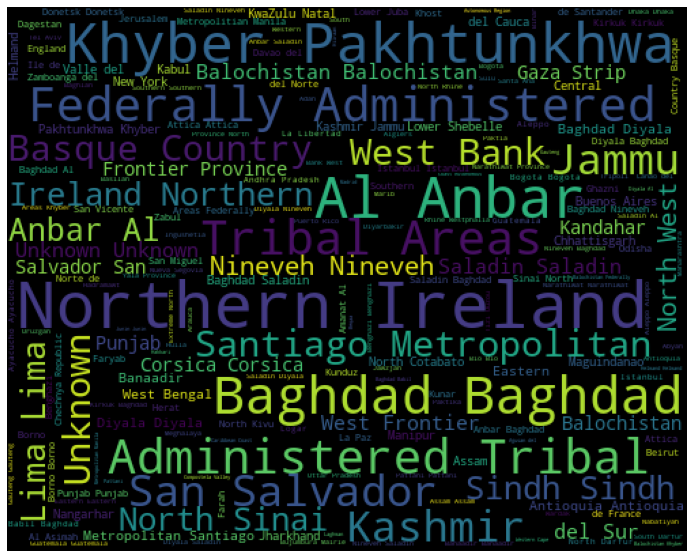

In [13]:
from wordcloud import WordCloud
from scipy import signal
cities = global_terror.state.dropna(False)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color = 'black',
                     width = 500,
                     height = 400).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [14]:
global_terror['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

### Terrorist activities each year 

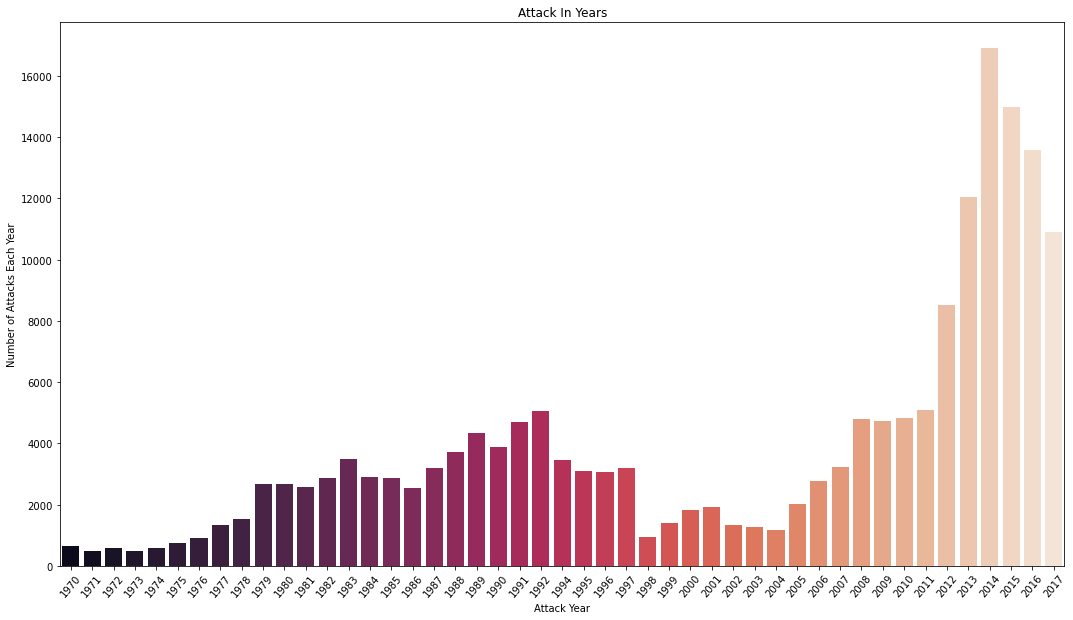

In [15]:
x_year = global_terror['Year'].unique()
y_count_years = global_terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 50)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks Each Year')
plt.title('Attack In Years')
plt.show()

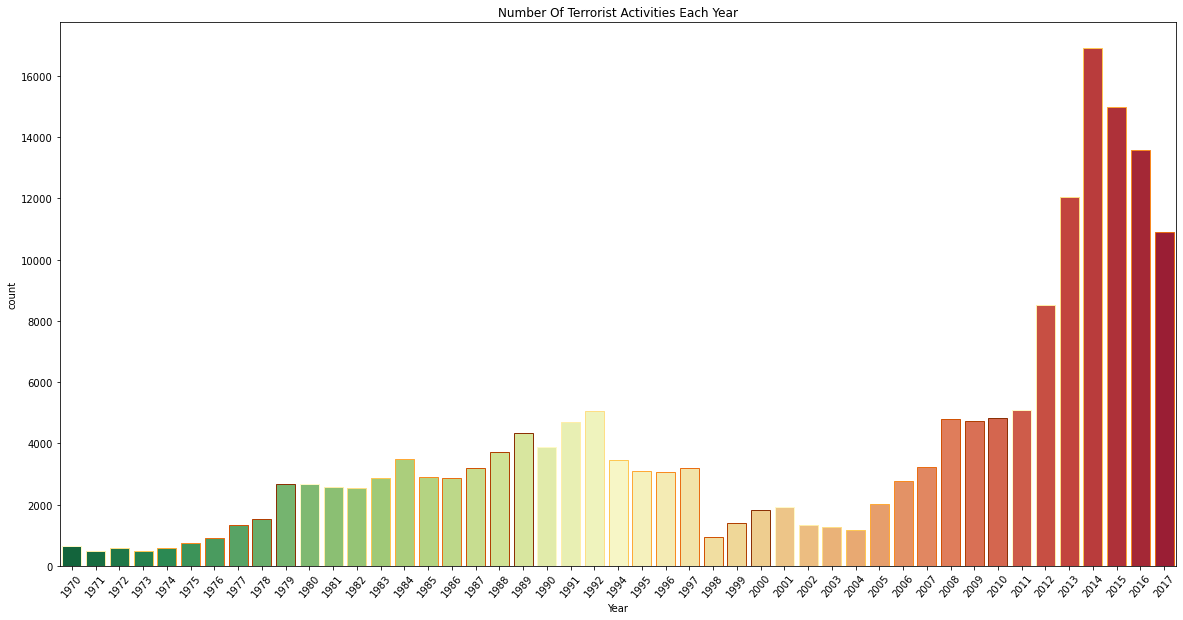

In [16]:
plt.subplots(figsize=(20,10))
sns.countplot('Year',data=global_terror,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=50)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

### Terrorist activities by region in each year 

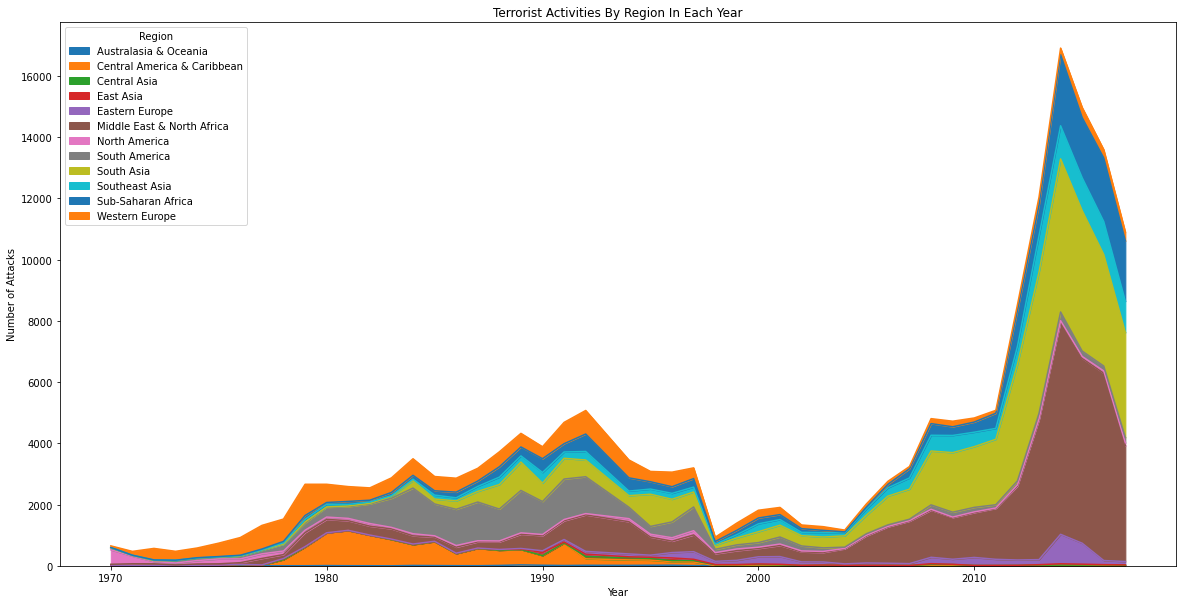

In [17]:
pd.crosstab(global_terror.Year, global_terror.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [18]:
global_terror['Wounded'] = global_terror['Wounded'].fillna(0).astype(int)
global_terror['Killed'] = global_terror['Killed'].fillna(0).astype(int)
global_terror['Casualities'] = global_terror['Killed'] + global_terror['Wounded']

In [19]:
# Top 50 worst terrorist attacks
global_terror1 = global_terror.sort_values(by='Casualities',ascending=False)[:50]

In [20]:
heat=global_terror1.pivot_table(index='Country',columns='Year',values='Casualities')
heat.fillna(0,inplace=True)

In [21]:
heat.head()

Year,1982,1984,1987,1992,1994,1995,1996,1997,1998,2001,...,2005,2006,2007,2008,2009,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0,0.0
Egypt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438.0
Ethiopia,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
heat.tail()

Year,1982,1984,1987,1992,1994,1995,1996,1997,1998,2001,...,2005,2006,2007,2008,2009,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sri Lanka,0.0,0.0,0.0,0.0,0.0,0.0,907.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Syria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,517.0,0.0,433.0,0.0
Tajikistan,0.0,0.0,0.0,800.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
United States,0.0,751.0,0.0,0.0,0.0,818.0,0.0,0.0,0.0,9574.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,910.0


In [23]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 50 Worst Terror Attacks in History from 1982 to 2017',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [24]:
global_terror.Country.value_counts()[:21] 

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Lebanon            2478
Name: Country, dtype: int64

### Top countries affected by terrorist attacks

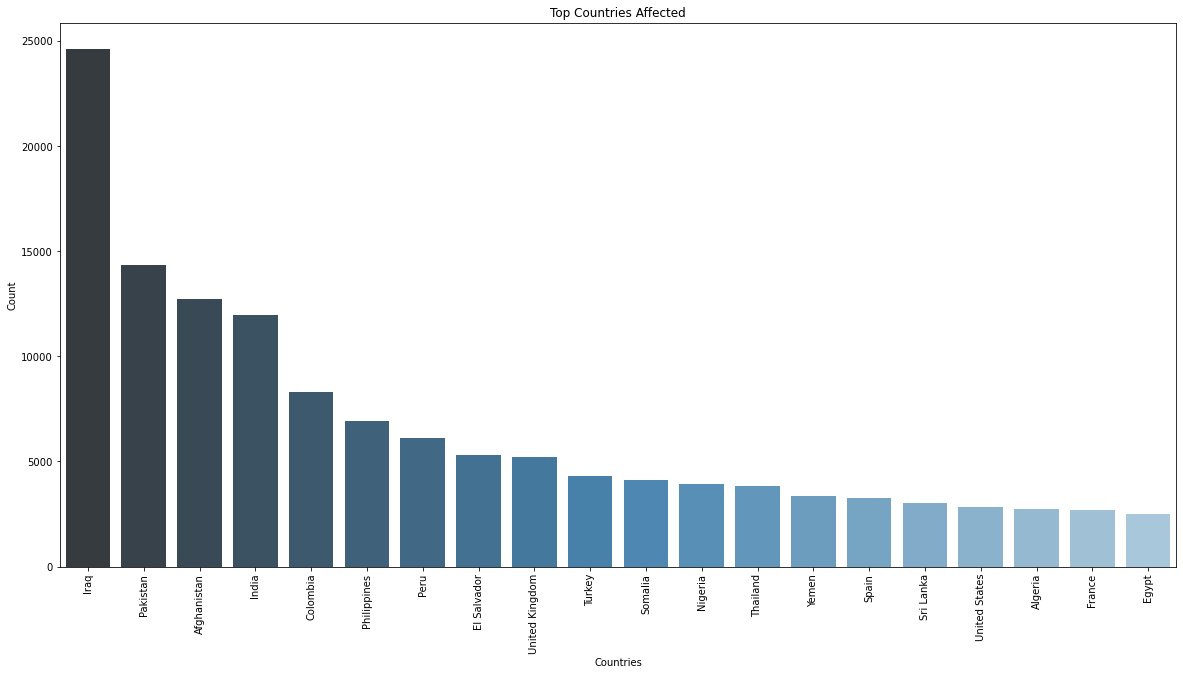

In [25]:
plt.subplots(figsize=(20,10))
sns.barplot(global_terror['Country'].value_counts()[:20].index,global_terror['Country'].value_counts()[:20].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

### Analysis on customized data
#### Terrorist attacks of a particular year and their locations
##### Let's look at the terrorist acts in the world over a certain year~

In [26]:
import folium
from folium.plugins import MarkerCluster

In [27]:
filterYear = global_terror['Year'] == 2001

In [28]:
filterData = global_terror[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] # get the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [29]:
map = folium.Map(location = [0, 50], tiles='CartoDB positron', zoom_start=2) 
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

#### From the above map, we can depict that the maximum attacks carried out in the year 2001 was on the African Continent, almost 1325 attacks. Then, the continent South America faced the highest number of attacks, i.e. 258.

### Terrorist's organizations operation in every country 

In [30]:
global_terror.Group.value_counts()[1:20]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

In [31]:
test = global_terror[global_terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [32]:
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [33]:
global_terror_df_group = global_terror.dropna(subset=['latitude','longitude'])

In [34]:
global_terror_df_group = global_terror_df_group.drop_duplicates(subset=['Country','Group'])

In [35]:
terrorist_groups = global_terror.Group.value_counts()[1:8].index.tolist()
global_terror_df_group = global_terror_df_group.loc[global_terror_df_group.Group.isin(terrorist_groups)]
print(global_terror_df_group.Group.unique())

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [36]:
map = folium.Map(location=[50, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(global_terror_df_group)):
    folium.Marker([global_terror_df_group.iloc[i]['latitude'],global_terror_df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(global_terror_df_group.iloc[i]['Group'], 
                  global_terror_df_group.iloc[i]['Country'])).add_to(map)
map

In [39]:
global_terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [40]:
# Total Number of people killed in terror attack
killData = global_terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


In [41]:
# Let's look at what types of attacks resulted in these deaths.
attackData = global_terror.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [42]:
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [43]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


In [44]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int32
 1   Assassination                        1 non-null      int32
 2   Bombing/Explosion                    1 non-null      int32
 3   Facility/Infrastructure Attack       1 non-null      int32
 4   Hijacking                            1 non-null      int32
 5   Hostage Taking (Barricade Incident)  1 non-null      int32
 6   Hostage Taking (Kidnapping)          1 non-null      int32
 7   Unarmed Assault                      1 non-null      int32
 8   Unknown                              1 non-null      int32
dtypes: int32(9)
memory usage: 44.0+ bytes


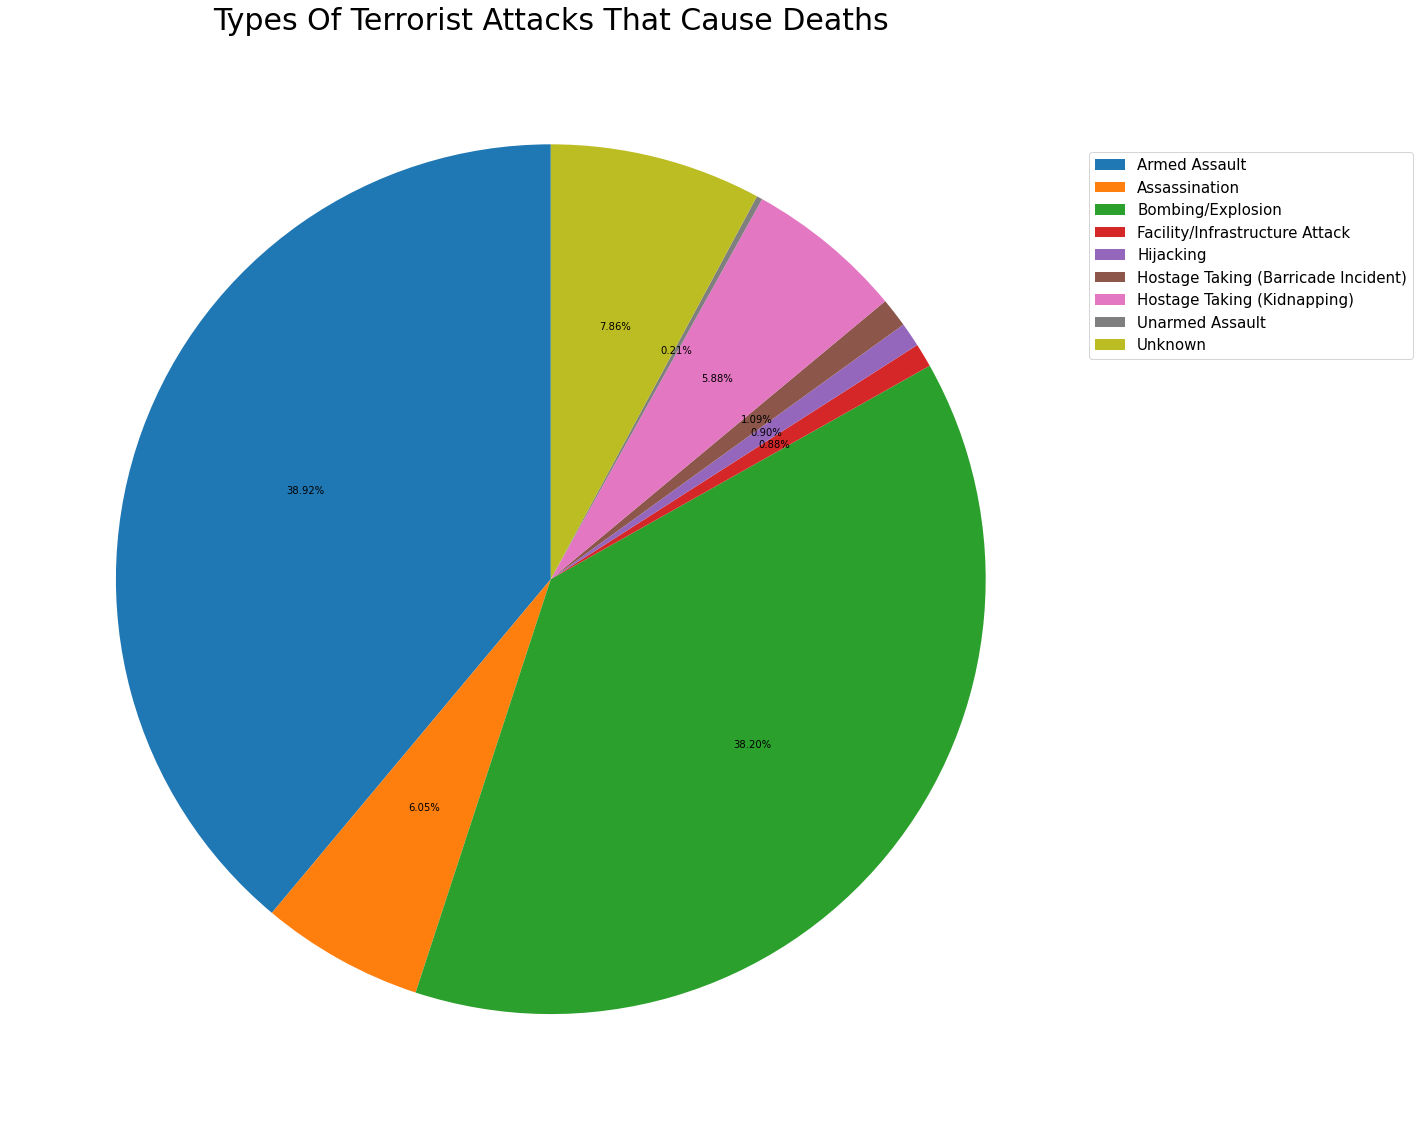

In [45]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types Of Terrorist Attacks That Cause Deaths',fontsize=30)
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

In [46]:
global_terror.head(2)

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0


In [47]:
# Number of people killed in Terrorist Attacks by Countries
countryData = global_terror.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [48]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


In [49]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

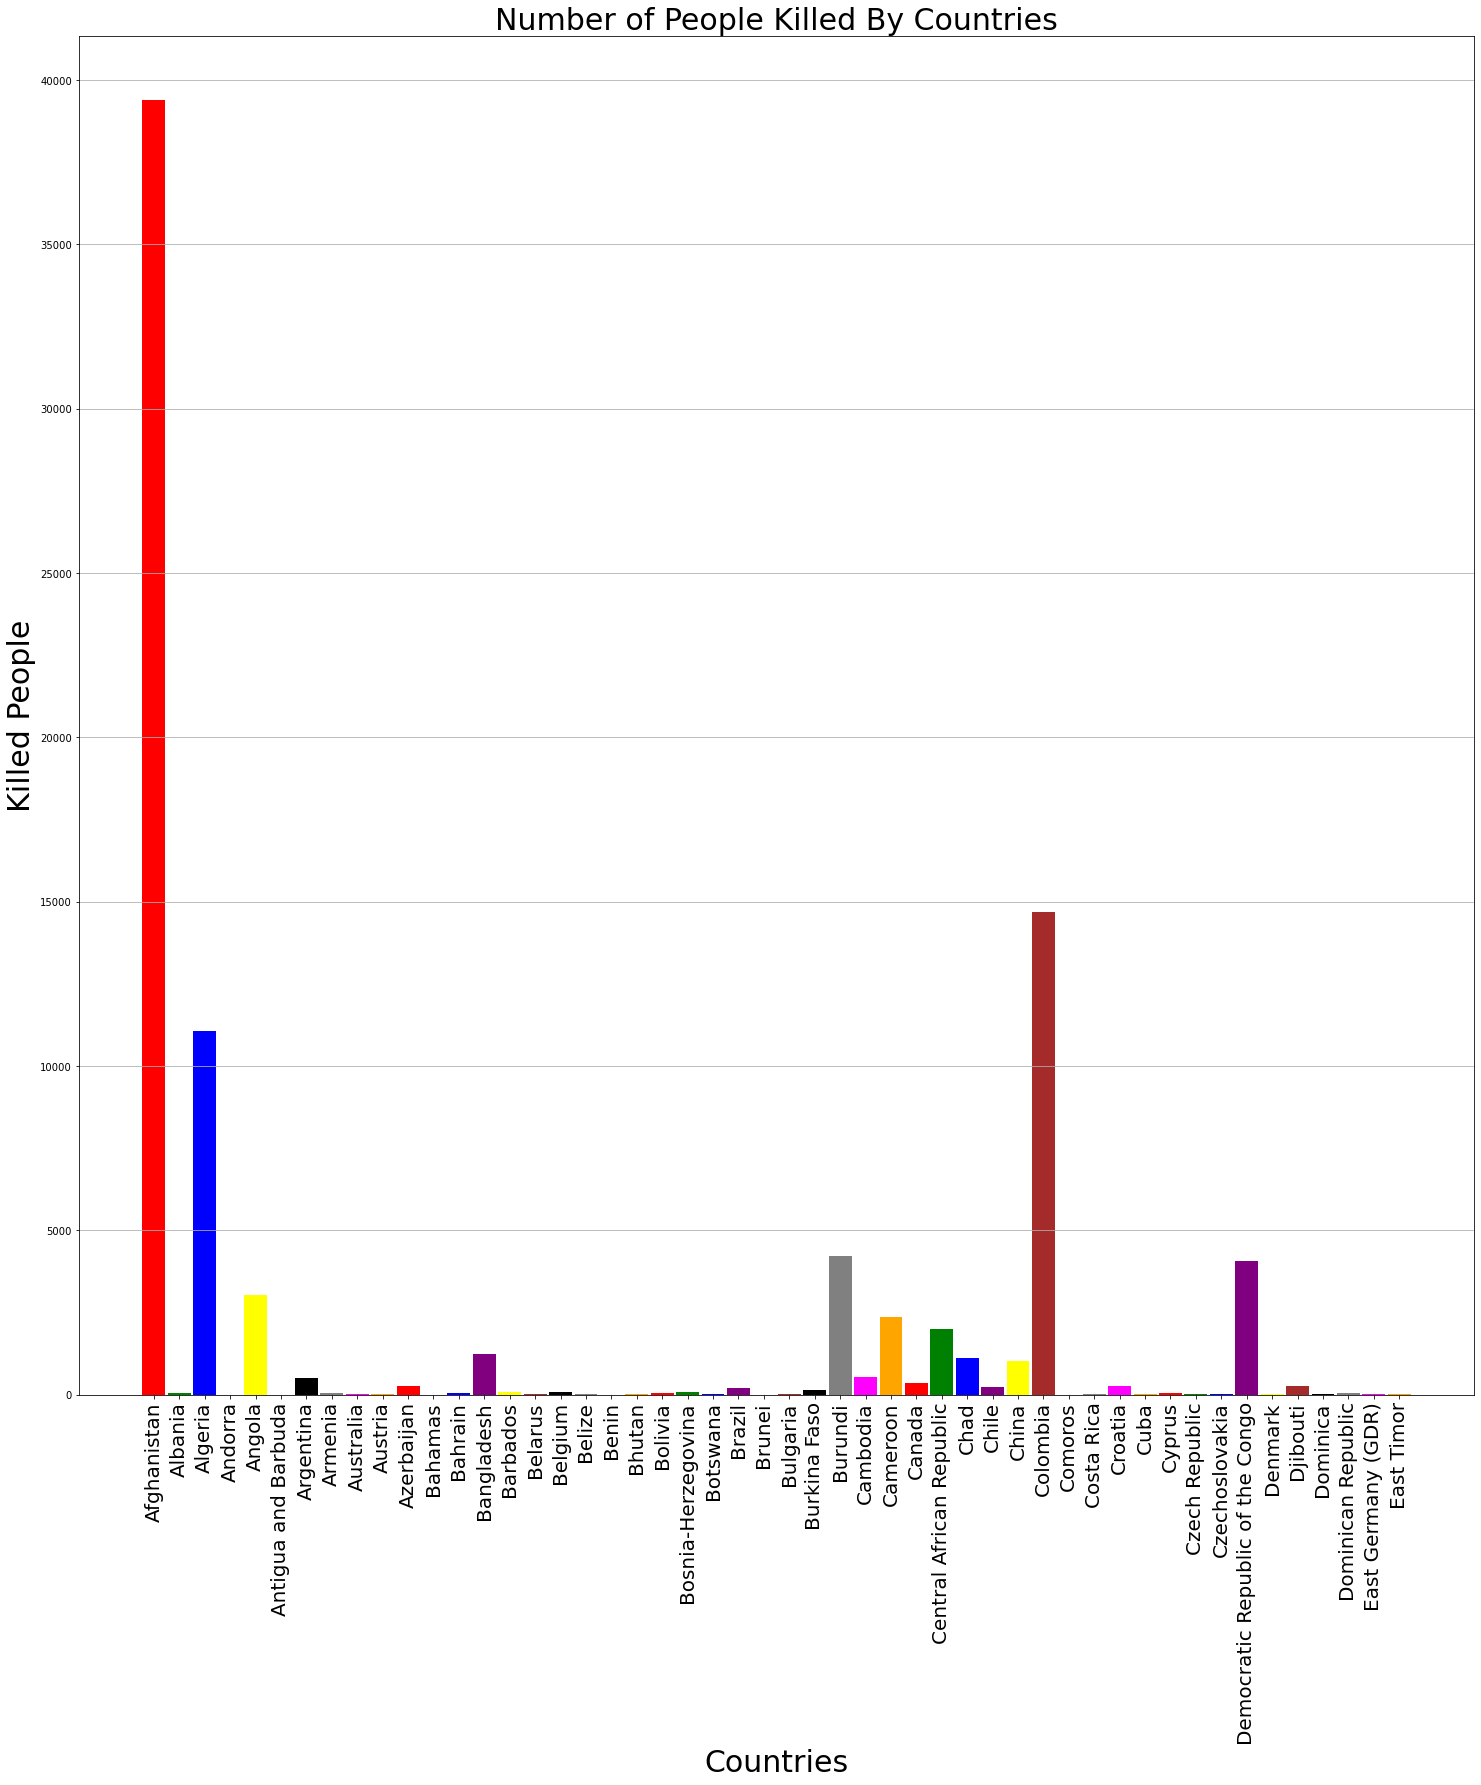

In [50]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=30)
plt.xlabel('Countries', fontsize = 30)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of People Killed By Countries', fontsize = 30)
# print(fig_size)
plt.show()

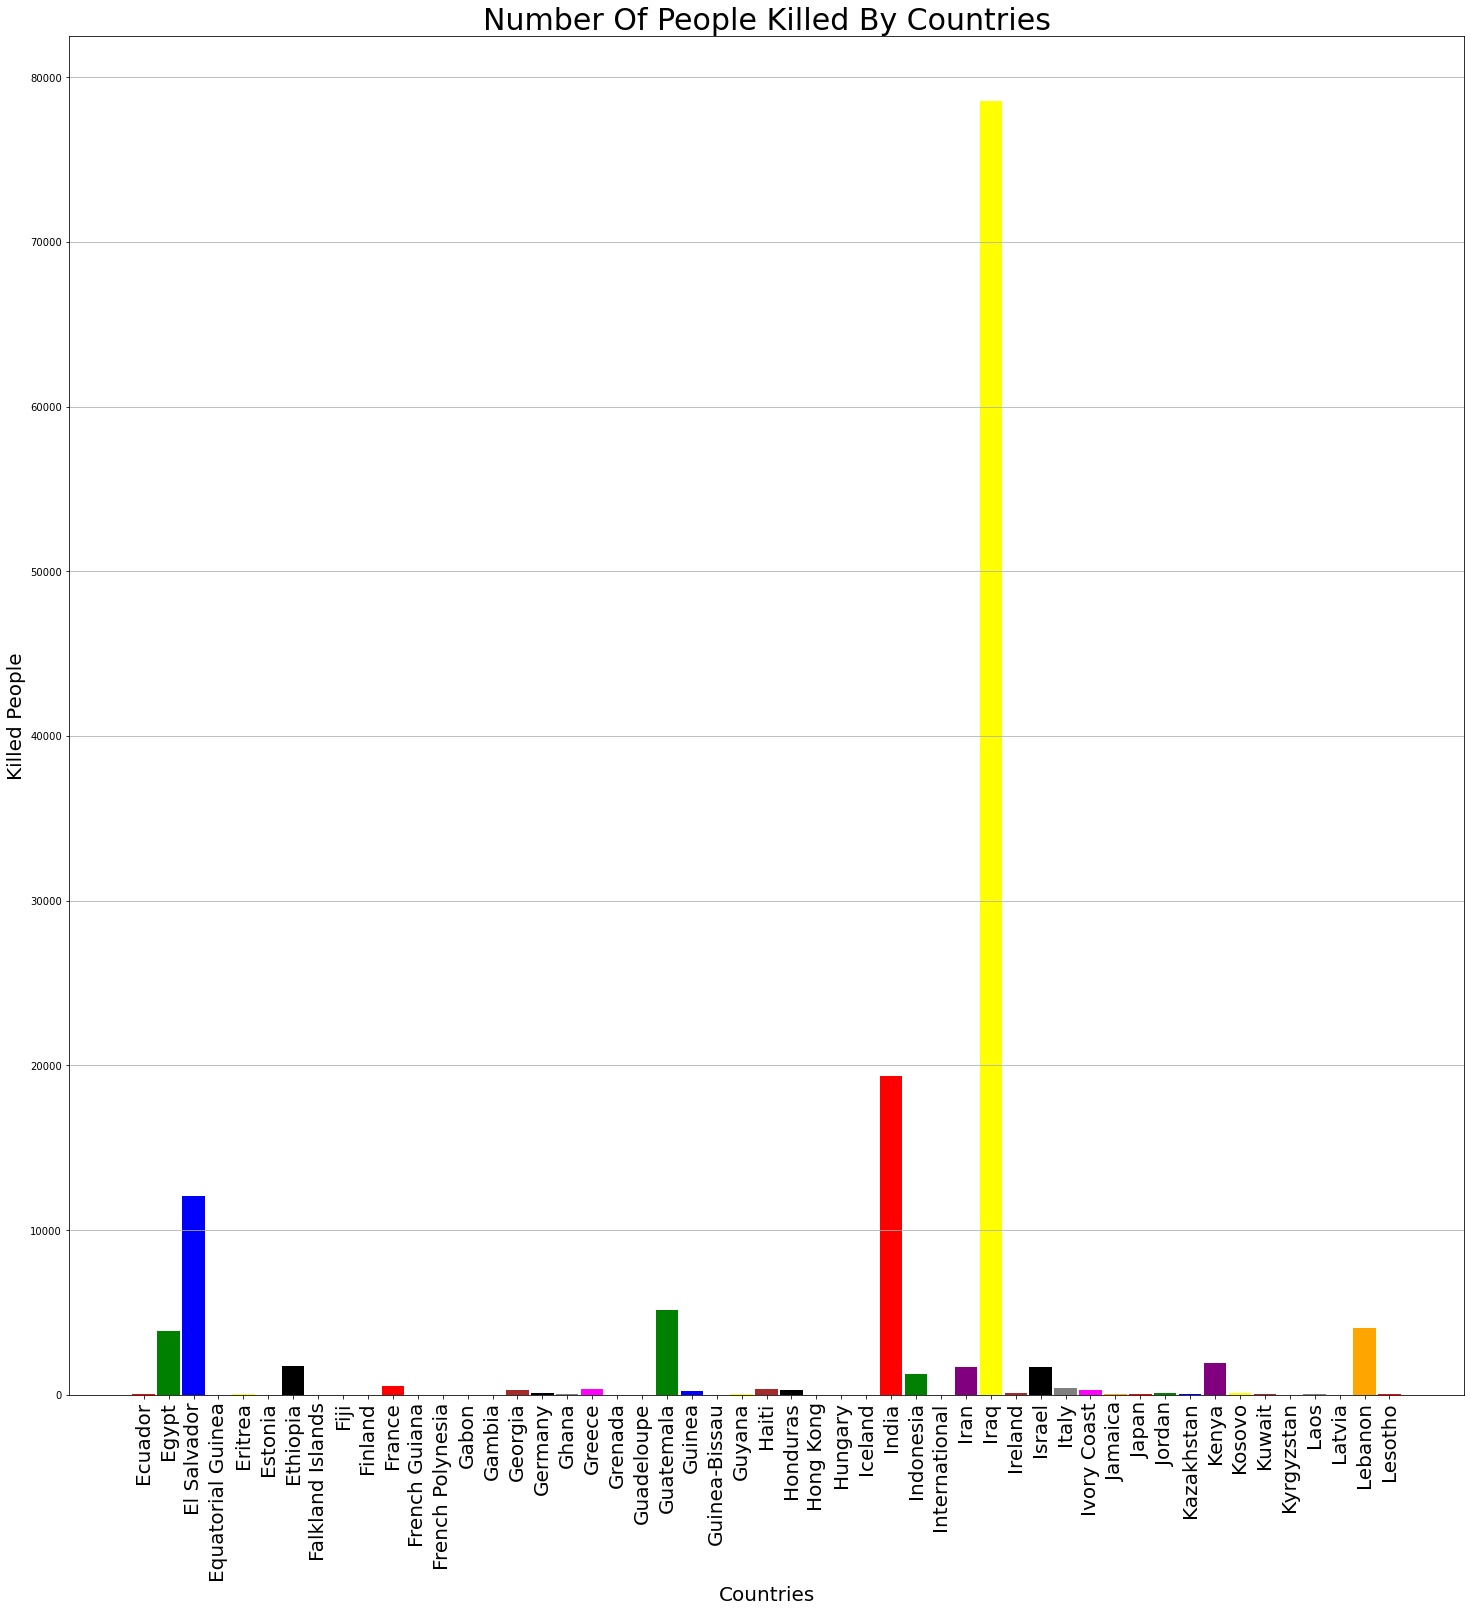

In [51]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number Of People Killed By Countries', fontsize = 30)
plt.show()

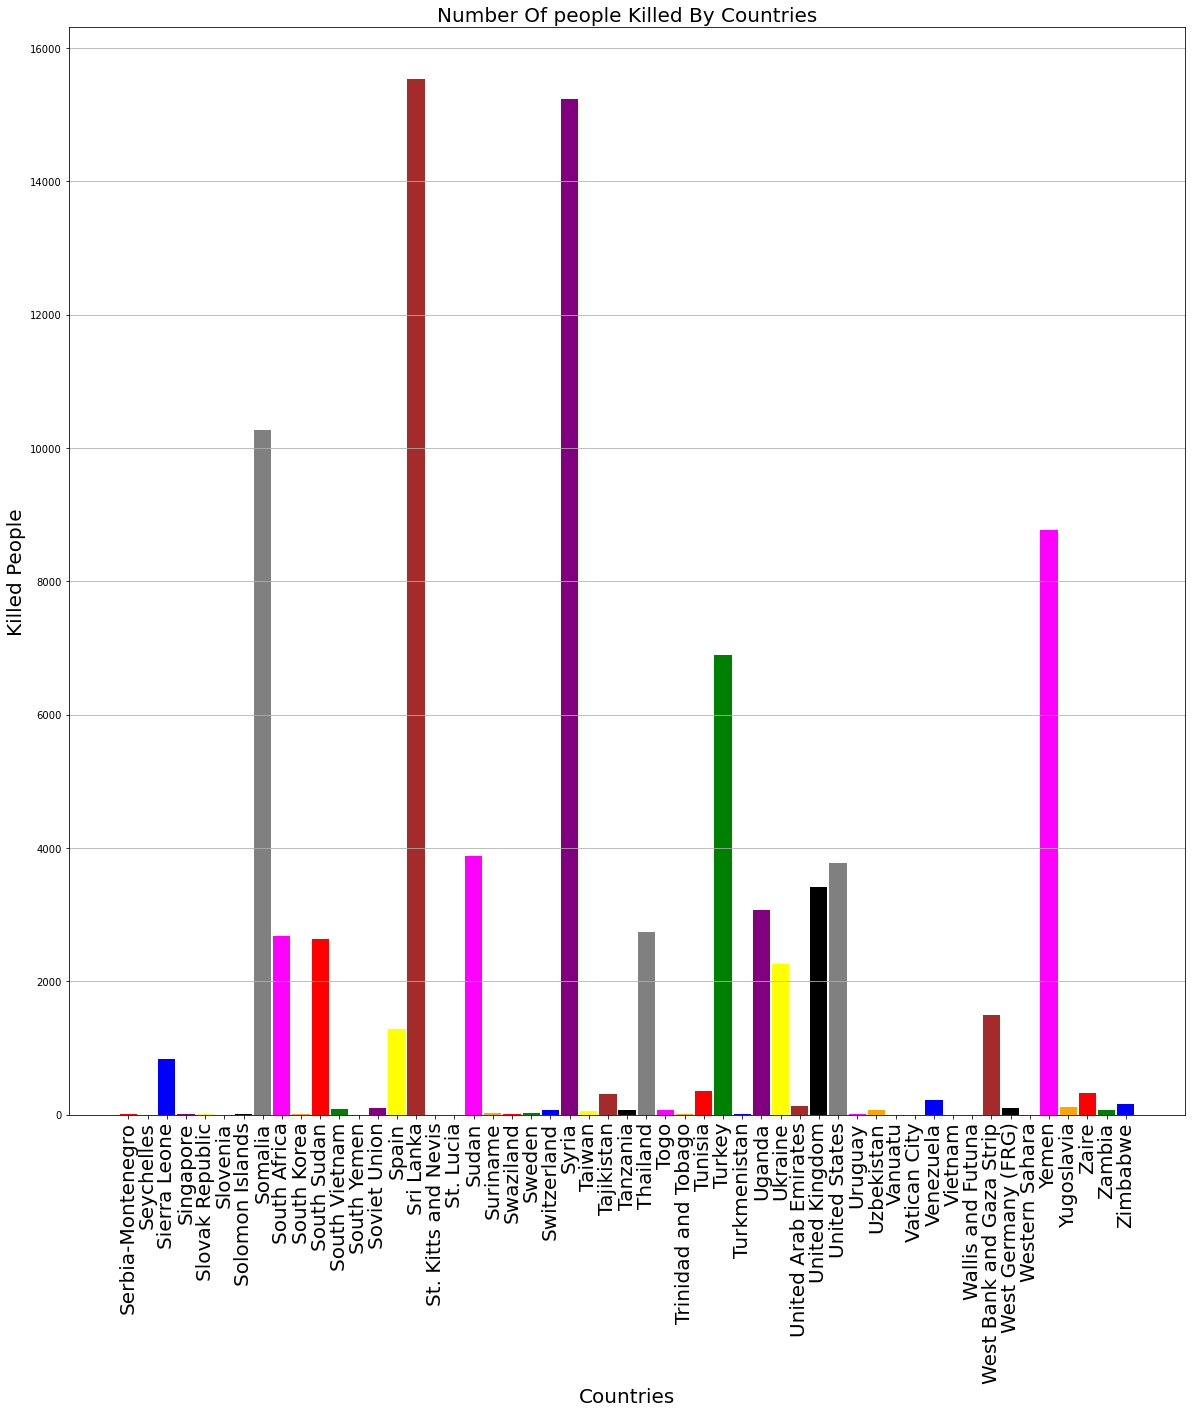

In [52]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number Of people Killed By Countries', fontsize = 20)
plt.show()

### **Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries.**

## That's it, thank you :)